<a href="https://colab.research.google.com/github/calderonf/CursoMachineLearning/blob/master/Codigo/Time_Series_Forecasting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [ ]:
#Datos de 
# https://es.investing.com/currencies/usd-cop-historical-data
df = pd.read_csv("DatosUSD_COP.csv",delimiter=";")

In [ ]:
print(df.head())

    Num       Fecha   Ultimo  Apertura   Maximo  Minimo   var  Siguiente
0  2632  11.10.2010  1786.85    1786.5  1787.15  1786.0  0.00    1789.50
1  2631  12.10.2010  1789.50    1801.0  1801.50  1779.8  0.15    1791.25
2  2630  13.10.2010  1791.25    1789.0  1795.25  1782.7  0.10    1801.90
3  2629  14.10.2010  1801.90    1790.0  1804.90  1785.0  0.59    1808.95
4  2628  15.10.2010  1808.95    1801.6  1811.35  1792.0  0.39    1808.50


In [ ]:
dfX=df[['Ultimo','Apertura','Maximo','Minimo','var']]
dfY=df['Siguiente']
print(dfX.shape)
print(dfY.shape)
print(dfX.shape[0])
print("entrenamiento", int(dfX.shape[0]*0.95))
print("validacion", int(dfX.shape[0]*0.05))

(2631, 5)
(2631,)
2631
entrenamiento 2499
validacion 131


In [ ]:
partition=int(dfX.shape[0]*0.95)
dfXtrain = dfX.loc[:partition]
dfXtest = dfX.loc[partition:]

dfYtrain = dfY.loc[:partition]
dfYtest = dfY.loc[partition:]

<Figure size 720x432 with 0 Axes>

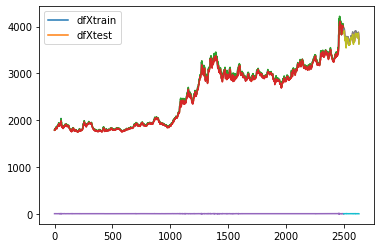

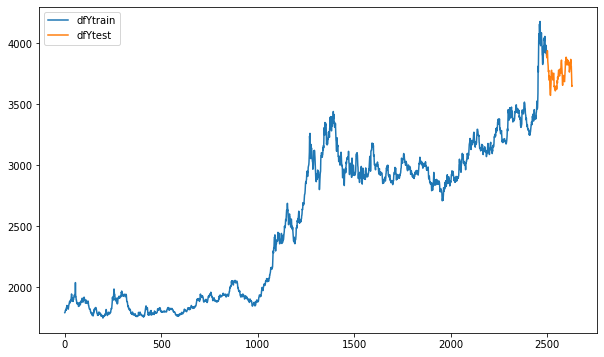

In [ ]:
plt.figure(figsize=(10, 6))
ax = dfXtrain.plot()
dfXtest.plot(ax=ax)
plt.legend(['dfXtrain', 'dfXtest']);
plt.show()
plt.figure(figsize=(10, 6))
ax = dfYtrain.plot()
dfYtest.plot(ax=ax)
plt.legend(['dfYtrain', 'dfYtest']);
plt.show()

In [ ]:
scaler = MinMaxScaler()#StandardScaler
scaler.fit(dfXtrain.values)
train_sc = scaler.transform(dfXtrain.values)
test_sc = scaler.transform(dfXtest.values)

# Crear y entrenar el modelo

In [ ]:
nn_model = Sequential()
#https://keras.io/api/layers/core_layers/dense/
nn_model.add(Dense(100, input_dim=5, activation='relu',use_bias=True))
nn_model.add(Dense(50, activation='relu',use_bias=True))
nn_model.add(Dense(1,use_bias=True))
#https://keras.io/api/losses/
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=6, verbose=1)
history = nn_model.fit(train_sc, dfYtrain.values, epochs=100, batch_size=32, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 6764724.5000
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 6565973.0000
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 5927936.5000
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 4652464.0000
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 2902777.7500
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 1282078.7500
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 367996.8125
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 93944.8203
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 46834.0547
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 37443.2305
Epoch 11/100
79/79 [==============================] - 0s 1ms/step - loss: 33091.3281
Epoch 12/100
79/79 [==============================] - 0s 1ms/

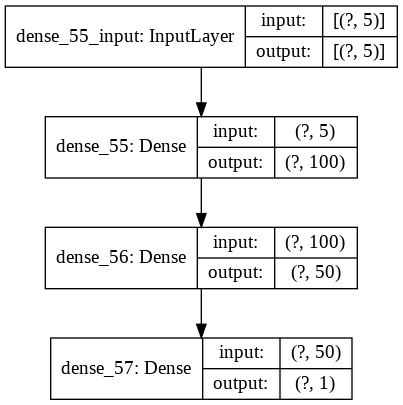

In [ ]:
from  keras.utils import plot_model
plot_model(nn_model, to_file="modelo.png",show_shapes=True)

In [ ]:
y_pred_test_nn = nn_model.predict(test_sc)
y_train_pred_nn = nn_model.predict(train_sc)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(dfYtrain.values, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(dfYtest.values, y_pred_test_nn)))

The R2 score on the Train set is:	0.997
The R2 score on the Test set is:	0.847


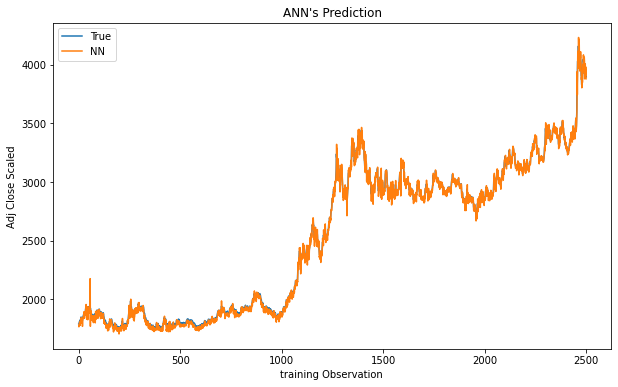

promedio error diferencial -3.1623106060606


In [ ]:
nn_y_pred_train = nn_model.predict(train_sc)
plt.figure(figsize=(10, 6))
plt.plot(dfYtrain.values, label='True')
plt.plot(nn_y_pred_train, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('training Observation ')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();
print("promedio error diferencial",np.average(dfYtest.values-y_pred_test_nn))

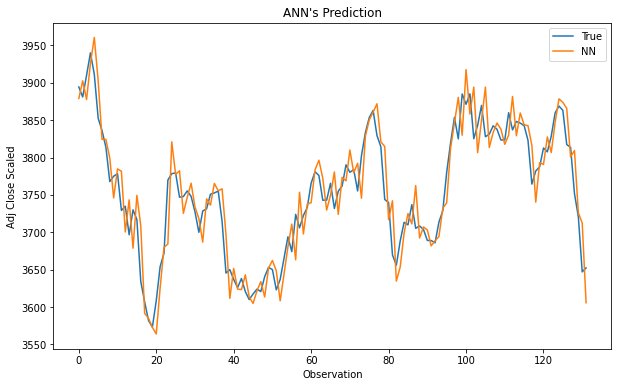

promedio error diferencial -3.1623106060606


In [ ]:
nn_y_pred_test = nn_model.predict(test_sc)
plt.figure(figsize=(10, 6))
plt.plot(dfYtest.values, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();
print("promedio error diferencial",np.average(dfYtest.values-y_pred_test_nn))

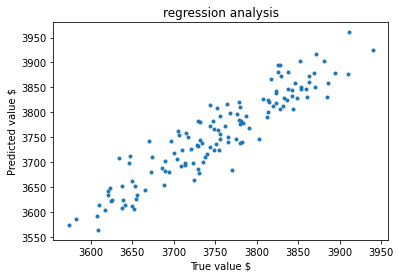

In [ ]:
plt.figure()
plt.plot(dfYtest.values,y_pred_test_nn,'.')
plt.xlabel('True value $')
plt.ylabel('Predicted value $')
plt.title('regression analysis')
plt.show()

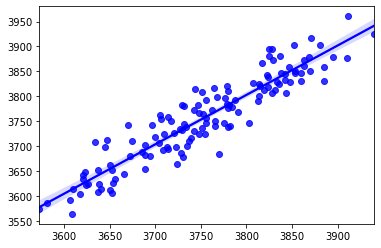

In [ ]:
from seaborn import regplot
#https://seaborn.pydata.org/generated/seaborn.regplot.html

ax = regplot(x=dfYtest.values, y=y_pred_test_nn, color="b")

In [ ]:
# hoy: 
#Fecha    	  Último	  Apertura	Máximo	    Mínimo	    % var.
#10.11.2020	  3.652,38	3.649,21	3.673,50	  3.641,78	  0,15%
#10.11.2020	  3631.50	  3649.21	  3673.50	    3628.20	-0.43%
XHoy=np.array([[3631.50,3649.21,3673.50,3628.20,-0.43]])
nn_y_Maniana = nn_model.predict(scaler.transform(XHoy))
print("Valor de mañana: ",nn_y_Maniana[0][0])

Valor de mañana:  3629.5994
